In [132]:
# import vulnerability data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
%matplotlib inline


In [133]:
roadId = input('Please write the Road ID: ')

Please write the Road ID: N1


In [135]:
vulnerability_data = pd.read_csv('vulnerabilityroad'+str(roadId)+'.csv')
trafficperlane = pd.read_csv('trafficperlaneN1.csv')
traffic = trafficperlane[['heavyTruck','mediumTruck','smallTruck']]

economic_vulnerability = vulnerability_data['TotalEconomicVulnerability'].tolist()
chainage = vulnerability_data['chainage'].tolist()
bridge_vulnerability = vulnerability_data['BridgeFailureLikelihood'].tolist()

road_segments = []
for segment in chainage:
    round_segment = round(segment,1)
    road_segments.append(round_segment)
    
HeavyTrucks = traffic['heavyTruck'].tolist()
MediumTrucks = traffic['mediumTruck'].tolist()
SmallTrucks = traffic['smallTruck'].tolist()
Cargo = []
for i in range(len(HeavyTrucks)):
    cargo = HeavyTrucks[i]+MediumTrucks[i]+SmallTrucks[i]
    Cargo.append(cargo)
    
part_vulnerability = economic_vulnerability[0:100]
part_bridge = bridge_vulnerability[0:100]
part_roadsegments = road_segments[0:100]

part_HeavyTrucks = HeavyTrucks[0:100]
part_MediumTrucks = MediumTrucks[0:100]
part_SmallTrucks = SmallTrucks[0:100]
part_Cargo = Cargo[0:100]

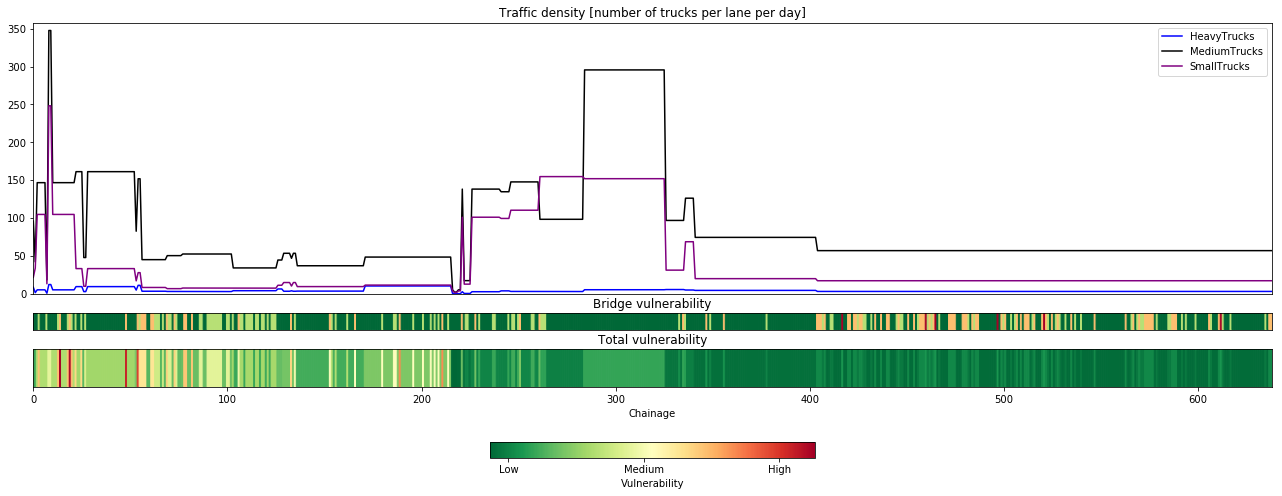

In [139]:
# traffic density per type of truck

def plot_vulnerability_detailed(segments,HeavyTrucks,MediumTrucks,SmallTrucks,Bridge,Economic):
    
    number_segments = len(segments)
    x = np.arange(number_segments)
    y1 = np.ones(number_segments)
    y2 = np.array(HeavyTrucks)
    y3 = np.array(MediumTrucks)
    y4 = np.array(SmallTrucks)
    
    xmin = x.min()
    xmax = x.max()
    
    y2min = y2.min()
    y3min = y3.min()
    y4min = y4.min()
    ymin = min(y2min,y3min,y4min)
    
    y2max = y2.max()
    y3max = y3.max()
    y4max = y4.max()
    ymax = max(y2max,y3max,y4max)

    # Two subplots, the axes array is 1-d
    fig = plt.figure(figsize=(20, 8))
    gs = gridspec.GridSpec(3, 1, height_ratios=[5,0.3,2]) 
    
    ax0 = plt.subplot(gs[0])
    ax0.plot(x, y2, label = 'HeavyTrucks', color = 'blue')
    ax0.plot(x, y3, label = 'MediumTrucks', color = 'black')
    ax0.plot(x, y4, label = 'SmallTrucks', color = 'purple')
    ax1 = plt.subplot(gs[1])
    plot1 = ax1.hexbin(x, y1, bridge_vulnerability, gridsize=number_segments-1, cmap='RdYlGn_r')
    ax2 = plt.subplot(gs[2])
    plot2 = ax2.hexbin(x, y1, economic_vulnerability, gridsize=number_segments-1, cmap='RdYlGn_r')
    
    # Set titles of subplots
    ax0.set_title('Traffic density [number of trucks per lane per day]')
    ax1.set_title('Bridge vulnerability')
    ax2.set_title('Total vulnerability')
    
    # Change layout
    fig.subplots_adjust(hspace=0.15, left=0.07, right=0.93)
    
    ax0.axis([xmin, xmax, 0, ymax+10])
    ax0.get_xaxis().set_visible(False)
    ax0.legend()
    ax1.axis([xmin, xmax, 0.9999, 1.0001])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.set_frame_on(True)
    ax2.axis([xmin, xmax, 0.9999, 1.0001])
    ax2.get_yaxis().set_visible(False)
    ax2.set_frame_on(True)
                                
    # Set xlabel for graphs
    plt.xlabel('Chainage')
    if number_segments <= 100:
        plt.xticks(x,road_segments,rotation='vertical')

    # Colorbar for Total vulnerability graph    
    cb = fig.colorbar(plot, ax=ax2, orientation='horizontal', pad=0.5)
    cb.set_ticks([1000,2750,4500])
    cb.set_ticklabels(['Low','Medium','High'])
    cb.set_label('Vulnerability')

plot_vulnerability_detailed(road_segments,HeavyTrucks,MediumTrucks,SmallTrucks,bridge_vulnerability,economic_vulnerability)

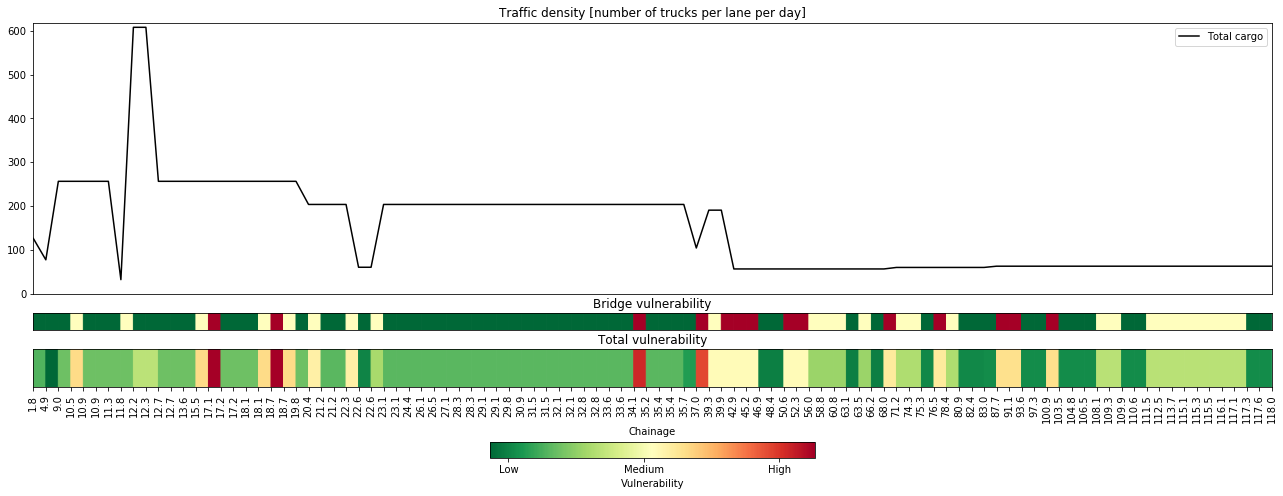

In [138]:
# total cargo traffic density

def plot_vulnerability_total(road_segments, Cargo, Bridge, Economic):
    
    number_segments = len(road_segments)
    x = np.arange(number_segments)
    y1 = np.ones(number_segments)
    y2 = np.array(Cargo)
    
    xmin = x.min()
    xmax = x.max()
    
    y2min = y2.min()
    y2max = y2.max()

    # Two subplots, the axes array is 1-d
    fig = plt.figure(figsize=(20, 8))
    gs = gridspec.GridSpec(3, 1, height_ratios=[5,0.3,2]) 
    
    ax0 = plt.subplot(gs[0])
    ax0.plot(x, y2, label = 'Total cargo', color = 'black')
    ax1 = plt.subplot(gs[1])
    plot1 = ax1.hexbin(x, y1, Bridge, gridsize=number_segments-1, cmap='RdYlGn_r')
    ax2 = plt.subplot(gs[2])
    plot2 = ax2.hexbin(x, y1, Economic, gridsize=number_segments-1, cmap='RdYlGn_r')
    
    # Set titles of subplots
    ax0.set_title('Traffic density [number of trucks per lane per day]')
    ax1.set_title('Bridge vulnerability')
    ax2.set_title('Total vulnerability')
    
    # Change layout
    fig.subplots_adjust(hspace=0.15, left=0.07, right=0.93)
    
    ax0.axis([xmin, xmax, 0, y2max+10])
    ax0.get_xaxis().set_visible(False)
    ax0.legend()
    ax1.axis([xmin, xmax, 0.9999, 1.0001])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.set_frame_on(True)
    ax2.axis([xmin, xmax, 0.9999, 1.0001])
    ax2.get_yaxis().set_visible(False)
    ax2.set_frame_on(True)
                                
    # Set xlabel for graphs
    plt.xlabel('Chainage')
    if number_segments <= 100:
        plt.xticks(x,road_segments,rotation='vertical')

    # Set colorbar
    cb = fig.colorbar(plot, ax=ax2, orientation='horizontal', pad=0.5)
    cb.set_ticks([1000,2750,4500])
    cb.set_ticklabels(['Low','Medium','High'])
    cb.set_label('Vulnerability')

plot_vulnerability_total(part_roadsegments,part_Cargo,part_bridge,part_vulnerability)

   NumberA  NumberB  NumberC  NumberD
0        0        0        0        0
1        1        1        1        1
2        2        2        2        2
3        3        3        3        3
4        4        4        4        4
0     0
1     4
2     8
3    12
4    16
dtype: int64


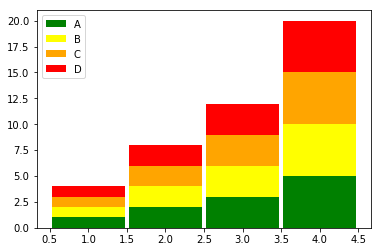

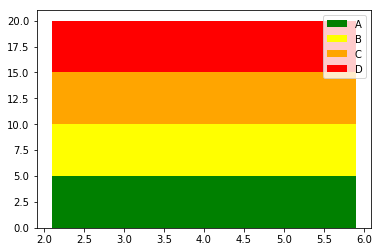

In [71]:
number_segments = 5
x = np.arange(number_segments)
d = { 'NumberA' : np.array(range(5)),
      'NumberB' : np.array(range(5)),
      'NumberC' : np.array(range(5)),
      'NumberD' : np.array(range(5))
    }
df = pd.DataFrame( d, index=x )
print(df)
total = df.sum(axis=1)
print(total)

bins = number_segments
x1 = df['NumberA']
x2 = df['NumberB']
x3 = df['NumberC']
x4 = df['NumberD']

width = 0.95
bins = x

plt.figure()
plt.hist([x1,x2,x3,x4], bins, rwidth=width, stacked=True, normed = False, cumulative = True, align = 'right', color =
         ['green','yellow','orange','red'], label = ['A','B','C','D'])
plt.legend()
plt.show()

#hist(x, bins, range, normed, weights, cumulative, bottom, histtype, align, orientation, rwidth, log, color, label, 
#     stacked, hold, data, **kwargs)